# PCA and Eigenanalysis of Olympic Medal Counts over Time

The file oly_medal_counts.csv contains the total number of Olympic medals won by each country in that year since 1896. In this notebook we will study the trends in the medal counts over time and learn how to extract these trends as features or responses through principal components analysis.

### 0. Getting Started


###  Read in the Data

Read in the data as a pandas dataframe, letting the row names be the country names and the column names be the year of the Olympic games. We will take each country as an individual observation, and take the row corresponding to the $i^{th}$ country as the data vector $x_i,~i=1,...,n$. 

Convert the medal counts to numeric. If there are any NA counts, replace them with 0s.

In [2]:
import pandas as pd
df = pd.read_csv('./oly_medal_counts.csv')
df.fillna(0, inplace=True)
df

,Country,1896,1900,1904,1906,1908,1912,1920,1924,1928,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,United States,20,48,231,24,47,64,95,0,0,...,13,93,34,101,25,110,37,103,28,121
1,Mixed team,2,20,4,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Australia,2,5,4,3,0,0,3,6,4,...,1,58,2,50,2,46,3,35,3,29
3,Switzerland,3,9,3,8,0,1,11,0,0,...,7,9,11,5,14,7,9,4,11,7
4,Austria,5,6,3,9,1,4,0,0,0,...,17,3,17,7,23,3,16,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Guatemala,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
145,Gabon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
146,Kosovo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147,Fiji,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 1. EDA
#### Spaghetti Plot:

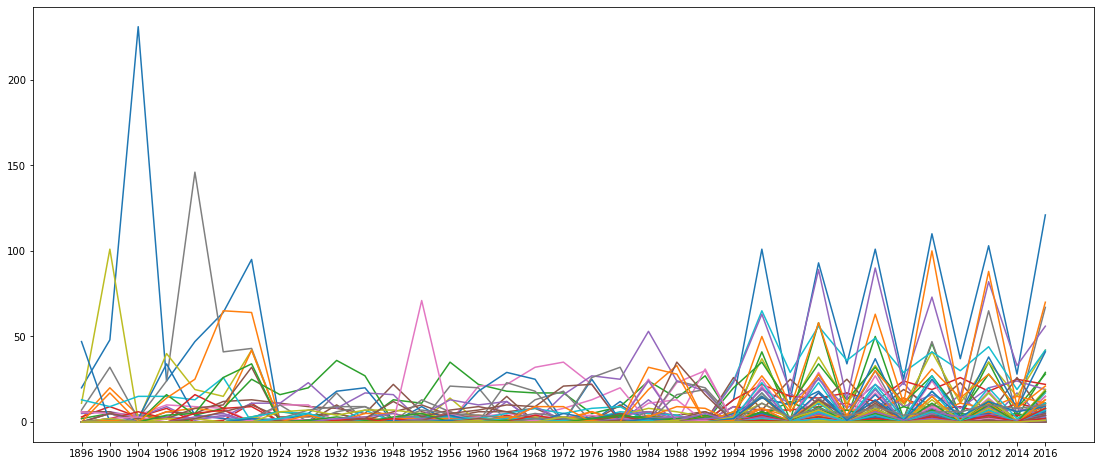

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,8))
for i in range(len(df)):
    plt.plot(df.iloc[i][1:])

There is a noticeable shift in the trends starting at 1994. Describe the pattern that you see emerge **starting from 1994 onward**. (2pts)  

A) After 1994, there seems to be larger, consistent spikes for all countries every 4 years and also the year increments are by 2 instead of 4.

#### Why has this change occurred?

A) I would assume this is the year they started adding a more olympic games which would infer more olypmic medals up for grabs and also a winter olympic games which occurs in between the 4 year increments of the original summer one. Upon doing research on the history of the Olympics, 1994 was the first year they had agreed to hold the winter olympics at a different time than the summer ones and continue to increment them every 4 years. 

Let's focus on the trend after 1994 and call this the "recent" era of the Olympics. Subset the data frame to contain years from 1994 onward (including 1994). (1pt)

In [4]:
df[df.columns[24:]]

,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,13,101,13,93,34,101,25,110,37,103,28,121
1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,41,1,58,2,50,2,46,3,35,3,29
3,9,7,7,9,11,5,14,7,9,4,11,7
4,9,3,17,3,17,7,23,3,16,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,1,0,0
145,0,0,0,0,0,0,0,0,0,1,0,0
146,0,0,0,0,0,0,0,0,0,0,0,1
147,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df2 = df[df.columns[24:]].copy()
df2.index = df.Country
df2

,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,
United States,13,101,13,93,34,101,25,110,37,103,28,121
Mixed team,0,0,0,0,0,0,0,0,0,0,0,0
Australia,1,41,1,58,2,50,2,46,3,35,3,29
Switzerland,9,7,7,9,11,5,14,7,9,4,11,7
Austria,9,3,17,3,17,7,23,3,16,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,0,0,0,0,0,0,0,0,0,1,0,0
Gabon,0,0,0,0,0,0,0,0,0,1,0,0
Kosovo,0,0,0,0,0,0,0,0,0,0,0,1


Calculate the total number of medals won for each year and visualize them. (1pt)

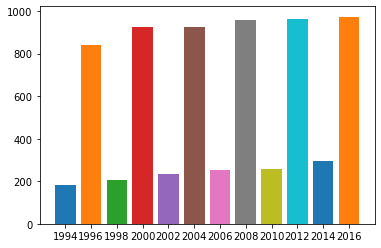

In [12]:
import numpy as np
for i in range(len(df2.columns)):
    plt.bar(df2.columns[i], np.sum(df2[df2.columns[i]]))

Are the total number medals won constant across years? Why or why not? (1pt)

Even if we consider the difference of winter and summer olympics, the number of medals won each year doesn't seem constant. It seems to be increasing each year. This may be because they are adding games to the olympics every year. 

To make a fair comparison of country performance, it makes more sense for us to look at the fraction of medals won per year. Convert your raw medal counts to the relative percentage of medals won per year and visualize it with another spaghetti plot (2pts). 

In [13]:
df2.loc['Total'] = [np.sum(df2[df2.columns[i]]) for i in range(len(df2.columns))]

In [14]:
df2

,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,
United States,13,101,13,93,34,101,25,110,37,103,28,121
Mixed team,0,0,0,0,0,0,0,0,0,0,0,0
Australia,1,41,1,58,2,50,2,46,3,35,3,29
Switzerland,9,7,7,9,11,5,14,7,9,4,11,7
Austria,9,3,17,3,17,7,23,3,16,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Gabon,0,0,0,0,0,0,0,0,0,1,0,0
Kosovo,0,0,0,0,0,0,0,0,0,0,0,1
Fiji,0,0,0,0,0,0,0,0,0,0,0,1


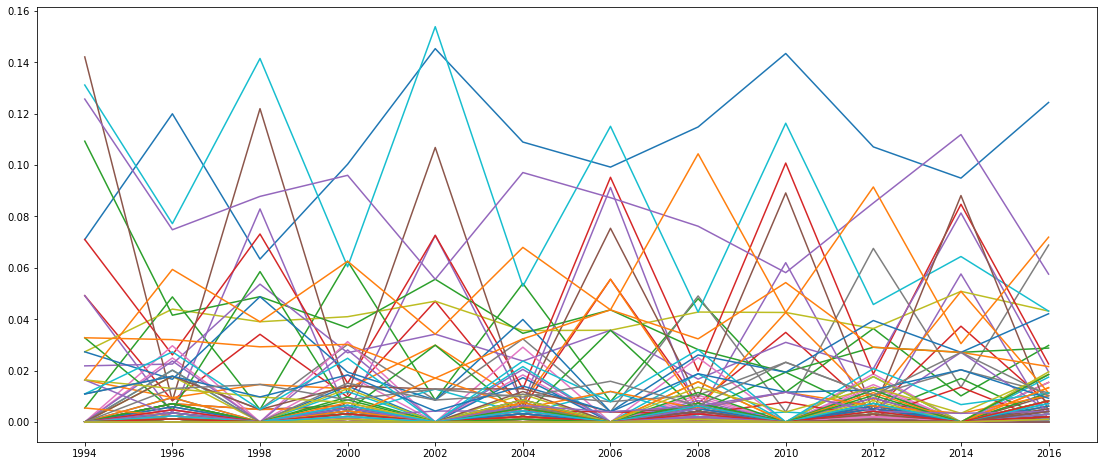

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,8))
for i in range(len(df2)-1):
    plt.plot(df2.iloc[i] / df2.iloc[-1])

### 3.  PCA, Eigenanalysis, and Identifying Archetypes (40 pts)

Let's fit a principal components analysis on the dataset, taking each country as the observational unit. 

Create a scree plot from the PCA results. (2pts)

In [16]:
df_prop = df2.iloc[:-1]/df2.iloc[-1]
df_prop

,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,
United States,0.071038,0.119952,0.063415,0.100324,0.145299,0.108954,0.099206,0.114823,0.143411,0.107069,0.094915,0.124358
Mixed team,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.005464,0.048694,0.004878,0.062567,0.008547,0.053937,0.007937,0.048017,0.011628,0.036383,0.010169,0.029805
Switzerland,0.049180,0.008314,0.034146,0.009709,0.047009,0.005394,0.055556,0.007307,0.034884,0.004158,0.037288,0.007194
Austria,0.049180,0.003563,0.082927,0.003236,0.072650,0.007551,0.091270,0.003132,0.062016,0.000000,0.057627,0.001028
...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001040,0.000000,0.000000
Gabon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001040,0.000000,0.000000
Kosovo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001028


In [17]:
df_center = df_prop.apply(lambda x: x-x.mean())
df_center

,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,
United States,0.064327,0.113241,0.056703,0.093612,0.138588,0.102242,0.092495,0.108111,0.136699,0.100357,0.088204,0.117646
Mixed team,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711
Australia,-0.001247,0.041982,-0.001833,0.055856,0.001836,0.047226,0.001225,0.041305,0.004916,0.029671,0.003458,0.023093
Switzerland,0.042469,0.001602,0.027435,0.002997,0.040297,-0.001318,0.048844,0.000595,0.028172,-0.002553,0.030577,0.000483
Austria,0.042469,-0.003148,0.076215,-0.003475,0.065938,0.000840,0.084558,-0.003580,0.055304,-0.006711,0.050916,-0.005684
...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.005672,-0.006711,-0.006711
Gabon,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.005672,-0.006711,-0.006711
Kosovo,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.006711,-0.005684


In [18]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA() 
pca.fit(df_center.T) 

PCA()

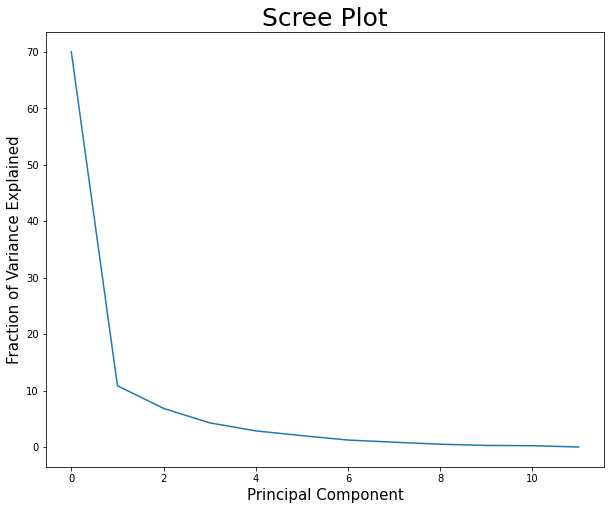

In [19]:
per_var = 100*pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(per_var))]

plt.figure(figsize=(10,8))
plt.plot(per_var)
plt.ylabel('Fraction of Variance Explained', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Scree Plot', fontsize=25)
plt.show()

Determine the number of principal components needed in order for the low rank approximation to recreate at least 80% of the variation present in the initial data. Call this number K. (2pts) 

In [20]:
np.cumsum(per_var)

array([ 70.02074876,  80.87482351,  87.72258774,  92.00740557,
        94.86767435,  96.88627858,  98.12298584,  98.97898431,
        99.47843759,  99.76051967, 100.        , 100.        ])

In order to recreate at least 80% of the variation present in the initial data, We will need k = 2.

For each of the following countries, calculate the rank K approximation:

-China

-Norway 

-Russia

-United States

(4pts total, 1 pt for each country).

In [29]:
from numpy.linalg import svd
def rank_k_approx(image,k):
    """
    Performs SVD decomposition. Truncates singular values at kth index & returns rank k approximation of image.
    
    --------
    Outputs: reconst_matrix, array of singular values s
    """
    U,D,Vt = svd(image,full_matrices=False)
    matrix_k = np.dot(U[:,:k],np.dot(np.diag(D[:k]),Vt[:k,:]))
   
    return matrix_k, D, Vt


In [52]:
mat = rank_k_approx(df_prop, 2)
mat = pd.DataFrame(mat[0], index=df_prop.index)
mat

,0,1,2,3,4,5,6,7,8,9,10,11
Country,,,,,,,,,,,,
United States,9.859097e-02,1.142202e-01,9.280682e-02,1.126480e-01,1.094876e-01,1.153917e-01,9.980671e-02,1.189831e-01,1.090765e-01,1.166769e-01,1.000746e-01,1.113635e-01
Mixed team,-8.005688e-18,-3.393267e-18,-7.761790e-18,-3.048620e-18,-7.867869e-18,-2.910599e-18,-7.330629e-18,-2.661439e-18,-7.123191e-18,-2.589065e-18,-6.478957e-18,-2.541261e-18
Australia,3.519927e-03,4.190048e-02,1.861485e-03,4.323967e-02,1.048528e-02,4.565790e-02,8.539291e-03,4.926381e-02,1.504472e-02,4.844263e-02,1.416563e-02,4.578575e-02
Switzerland,4.742079e-02,1.135392e-02,4.631182e-02,8.989804e-03,4.508379e-02,7.635738e-03,4.227156e-02,5.355715e-03,3.961511e-02,5.097863e-03,3.592801e-02,5.385186e-03
Austria,7.710978e-02,1.109302e-02,7.558939e-02,6.976924e-03,7.202831e-02,4.323033e-03,6.776723e-02,-6.204717e-05,6.224460e-02,-3.373767e-04,5.635778e-02,6.105340e-04
...,...,...,...,...,...,...,...,...,...,...,...,...
Guatemala,-3.499201e-05,1.617128e-04,-4.070315e-05,1.697322e-04,-3.693318e-06,1.811658e-04,-8.815093e-06,1.984877e-04,2.091221e-05,1.953553e-04,2.112489e-05,1.840482e-04
Gabon,-3.499201e-05,1.617128e-04,-4.070315e-05,1.697322e-04,-3.693318e-06,1.811658e-04,-8.815093e-06,1.984877e-04,2.091221e-05,1.953553e-04,2.112489e-05,1.840482e-04
Kosovo,-3.003075e-05,1.510089e-04,-3.540141e-05,1.583422e-04,-1.044226e-06,1.689047e-04,-5.957053e-06,1.848946e-04,2.155100e-05,1.819675e-04,2.155329e-05,1.714662e-04


In [55]:
China = mat.loc['China']
Norway = mat.loc['Norway']
Russia = mat.loc['Russia']
USA = mat.loc['United States']
China, Norway, Russia, USA

(0     0.027425
 1     0.072442
 2     0.024255
 3     0.073505
 4     0.037527
 5     0.076763
 6     0.033113
 7     0.081501
 8     0.042331
 9     0.080065
 10    0.039228
 11    0.075934
 Name: China, dtype: float64,
 0     0.117285
 1     0.017733
 2     0.114940
 3     0.011504
 4     0.109706
 5     0.007520
 6     0.103188
 7     0.000929
 8     0.094928
 9     0.000494
 10    0.085962
 11    0.001879
 Name: Norway, dtype: float64,
 0     0.088413
 1     0.081245
 2     0.084039
 3     0.079053
 4     0.094502
 5     0.080214
 6     0.086716
 7     0.081487
 8     0.091571
 9     0.079833
 10    0.083811
 11    0.076450
 Name: Russia, dtype: float64,
 0     0.098591
 1     0.114220
 2     0.092807
 3     0.112648
 4     0.109488
 5     0.115392
 6     0.099807
 7     0.118983
 8     0.109076
 9     0.116677
 10    0.100075
 11    0.111363
 Name: United States, dtype: float64)

For those 4 countries, plot the original data vs. the rank K approximation. (4 pts total, 1 pt per country)

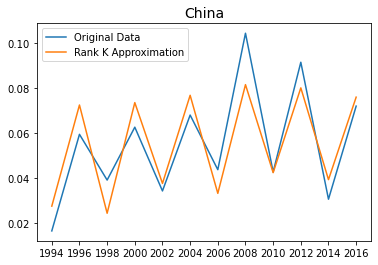

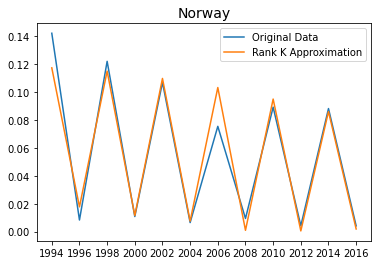

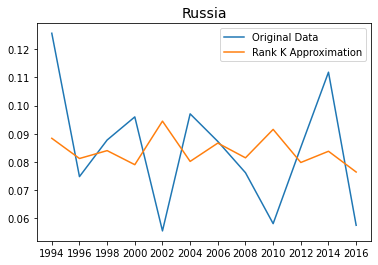

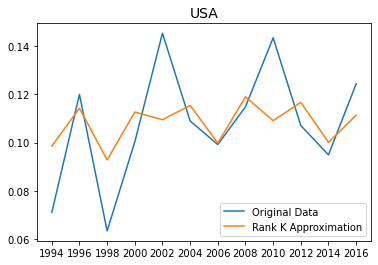

In [109]:
plt.figure()
plt.plot(df_prop.loc['China'], label = 'Original Data')
plt.plot(China, label = 'Rank K Approximation')
plt.title('China', size = 14)
plt.legend()
plt.figure()
plt.plot(df_prop.loc['Norway'], label = 'Original Data')
plt.plot(Norway, label = 'Rank K Approximation')
plt.title('Norway', size = 14)
plt.legend()
plt.figure()
plt.plot(df_prop.loc['Russia'], label = 'Original Data')
plt.plot(Russia, label = 'Rank K Approximation')
plt.title('Russia', size = 14)
plt.legend()
plt.figure()
plt.plot(df_prop.loc['United States'], label = 'Original Data')
plt.plot(USA, label = 'Rank K Approximation')
plt.title('USA', size = 14)

plt.legend()
plt.show()

Visualize the first two principal component vectors. (2 pts, one per PC vector)

In [64]:
pca = PCA(n_components=2)
eigenvecs = pca.fit_transform(df_center.T)
eigenvecs_df = pd.DataFrame(data = eigenvecs, 
                            columns = [r'$\hat{\phi}_1$', r'$\hat{\phi}_2$'],
                            index = np.arange(1, 13, 1))
eigenvecs_df

,$\hat{\phi}_1$,$\hat{\phi}_2$
1,0.116016,0.084868
2,-0.071038,-0.002696
3,0.113275,0.033785
4,-0.082383,0.019736
5,0.100152,-0.038240
6,-0.090466,0.017516
7,0.090243,-0.028629
8,-0.103402,-0.002625
9,0.072983,-0.067136
10,-0.103753,0.007091


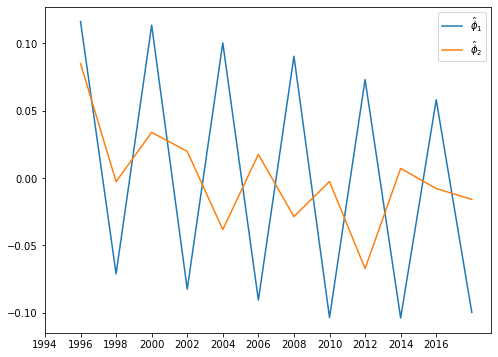

In [85]:
plt.figure(figsize=(8,6))
plt.plot(eigenvecs_df, label = eigenvecs_df.columns)
plt.xticks(range(12), labels=list(df_prop.columns))
plt.legend()
plt.show()

Focus on the first principal component for now. How can we interpret this principal component vector? (2pt)

This first principal component vector shows us that the variance in the winter Olympics is higher than the variance in the winter Olympics. 

If a country has a high PC1 score, what does that tell us about that country's historical performance at the summer and winter Olympics? (2pts)

If a country has a high PC1 score, that means their variance matches the direction of most important variance which in this case is positive during the winter Olympics. Therefore, having a high PC1 score would mean that countries variance of medals won is high during the winter and low during the summer. 

Compare the PC1 scores for China, Norway, Russia, and the United States. Which of them has the highest PC1 score? The lowest? (2pts) [Double check that this result aligns with your interpretation of the first principal component vector. ]

In [26]:
scores = pd.DataFrame(data = np.dot(df_center, eigenvecs),
                      columns = ['PC1_score', 'PC2_score'],  
                      index =  df_center.T.columns)

In [101]:
scores.loc[['China', 'Norway','Russia','United States']].sort_values('PC1_score')

,PC1_score,PC2_score
Country,,
China,-0.024405,-0.001448
United States,-0.007112,-0.008543
Russia,0.004235,0.007116
Norway,0.055540,0.003502


The country with the highest PC1 score is Norway and the country with the lowest PC2 score is the China. This aligns with my interpretation because China, Russia, and the United States seem like the typical powerhouse countries that are consistent in every Olympics but Norway seems like the type to be inconsistent with their medal winnings in the winter since sometimes they place and sometimes they don't, and their variance in the summer could be close to zero since they may barely place. 

#### The second principal component is harder to interpret, but there is a general trend in which earlier components are more positive and later components are closer to 0 or more negative. For this reason, we will interpret this component loosely as a general contrast between earlier years and more recent years. 

If a country has a high PC2 score, what does that tell us about that country's historical performance at the Olympics? (2pts)

If a country has a high PC2 score, that means their variance matches the direction of the second most important cause of variation which in this case we are saying is declining from previous years against more recent years. Therefore, if a country has a high PC2 score, its variance similarly begins to decline as the years become more recent. 

Create a scatter plot of the principal component scores, with the first PC score on the x-axis and the second PC score on the y-axis. (2pts)

Label the points with the name of their corresponding countries if the first PC score has an absolute value greater than 0.01 or the second PC score has a magnitude greater than 0.0025. (2pts)

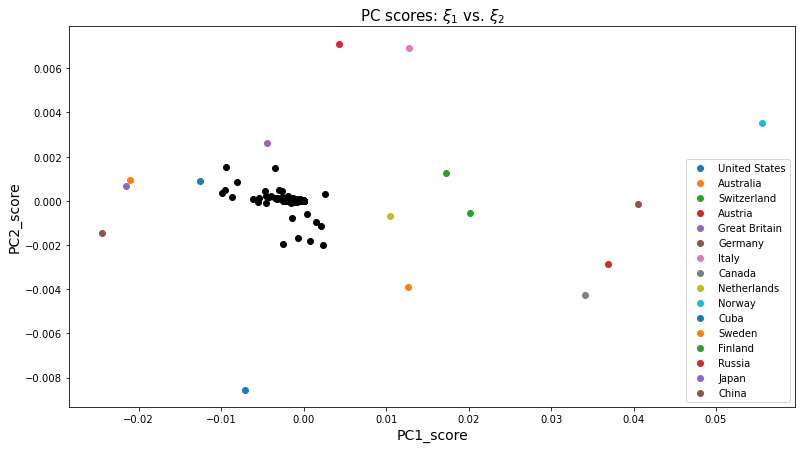

In [107]:
plt.figure(figsize=(13,7))
x = scores['PC1_score']
y = scores['PC2_score']
for i in range(len(x)):
    if((abs(x[i])>0.01) or (abs(y[i])>0.0025)):
        plt.scatter(x[i], y[i], label = scores.index[i])
    else:
        plt.scatter(x[i], y[i], color = 'black')
plt.legend()
plt.title(r'PC scores: '+r'$\xi_1$'+' vs. '+r'$\xi_2$', size = 15)
plt.xlabel('PC1_score', size = 14)
plt.ylabel('PC2_score', size = 14)
plt.show()

Let's take the 4 countries described above as "archetypal" countries. Describe the "profiles" for each of these archetypes, using the first two principal components to depict trends in historical performance at the Olympics. (8 pts total, 2 pts for each archetype.)

The first archetype like Norway would be countries whose variance slightly decreases over time and whose variance in higher in the winter than the summer. The second archetype like the United States would be countries whose variance slightly increases over time and whose variance is pretty consistent but slightly lower in the winter than the summer. The third archetype like China would be countries whose variance slightly increases over time whose variance is consistent in winter and summer but slightly increases in the summer slightly and decreases slightly in the winter. The last archetype would be like Russia and Italy, countries whose variance stays pretty consistent from winter to summer but decreases as the years go on. 